In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from keras.optimizers import Adam,SGD
import numpy as np
from keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images, test_images = train_images/255.0, test_images/255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(train_images.shape)
print(test_images.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


# *CNN MODEL*

In [20]:
#Create Convolution Base
#input shape--> 28X28 image in cifar and 1
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))       
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))       
model.add(MaxPooling2D((2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [21]:
#Flatten

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)               

In [23]:
#Compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 50, validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 0.0463 - val_accuracy: 0.9869
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0495 - val_accuracy: 0.9875
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0188 - accuracy: 0.9936 - val_loss: 0.0555 - val_accuracy: 0.9868
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0667 - val_accuracy: 0.9836
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0531 - val_accuracy: 0.9862
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0510 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9888


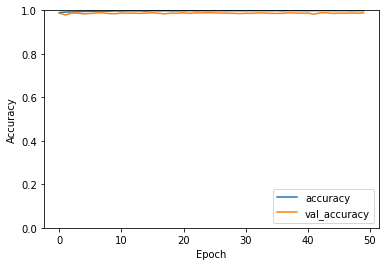

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc_cnn = model.evaluate(test_images, test_labels)

In [25]:
print(test_acc_cnn)

0.9887999892234802


# *FEED FORWARD NEURAL NETWORK*

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(2048, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [27]:
#Compiling the model

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9269 - val_loss: 0.1883 - val_accuracy: 0.9574
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1249 - accuracy: 0.9677 - val_loss: 0.1266 - val_accuracy: 0.9684
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - accuracy: 0.9762 - val_loss: 0.1620 - val_accuracy: 0.9637
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9812 - val_loss: 0.1149 - val_accuracy: 0.9691
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9836 - val_loss: 0.1219 - val_accuracy: 0.9720
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0511 - accuracy: 0.9870 - val_loss: 0.1017 - val_accuracy: 0.9781
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9877 - val_loss: 0.0860 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9843


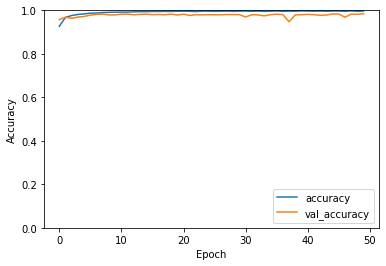

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc_feed = model.evaluate(test_images, test_labels)

In [29]:
print("CNN Test Accuracy:: ",test_acc_cnn)
print("Feed Forward Neural Network Test Accuracy:: ",test_acc_feed)

CNN Test Accuracy::  0.9887999892234802
Feed Forward Neural Network Test Accuracy::  0.9843000173568726
